In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from helper import *

# Plot focusing field lineout

In [3]:
# Get lineout 
filename_Fr = '../Fields/Fr/Merged_angle_0/fr_00000010.h5'
lineout_position = 0
x_Fr, Fr = get_lineout(filename_Fr,'transverse',lineout_position,'QPAD')

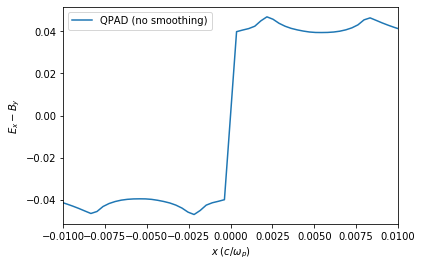

In [4]:
# select visualization range
x_min = -0.01
x_max = 0.01

# # Flip QPAD's result
L = len(Fr) // 2
# for i in range(L):
#     Fr[i] = -Fr[i]
Fr_flip = np.concatenate([-Fr[0:L],Fr[L:]])


# select visualization range
x_Fr_sub, Fr_flip_sub = select_lineout_range(x_Fr, Fr_flip, x_min, x_max)

### Plot the data
plt.plot(x_Fr_sub, Fr_flip_sub,label = 'QPAD (no smoothing)')
plt.legend(loc='best')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.xlim([x_min,x_max])
plt.ylabel('$E_x - B_y$')
plt.rcParams.update({'font.size': 10})
plt.show()

# Plot ion density lineout

In [9]:
# Get lineout 
filename_ion_density = '../Species2/Charge/Merged_angle_0/charge_00000010.h5'
lineout_position = 0
x_ni, ni = get_lineout(filename_ion_density,'transverse',lineout_position,'QPAD')

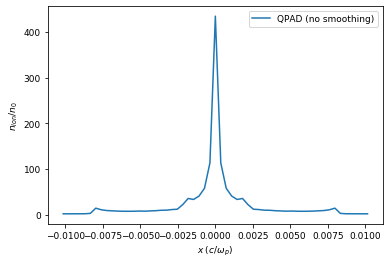

In [10]:
# select visualization range
x_min = -0.01
x_max = 0.01

x_ni_sub, ni_sub = select_lineout_range(x_ni, ni, x_min, x_max)

### Plot the data
plt.plot(x_ni_sub, ni_sub,label = 'QPAD (no smoothing)')
plt.legend(loc='upper right')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 9})
plt.show()

# Perform a linear regression

0.00036255989257405474


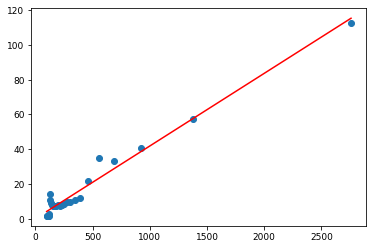

In [11]:
first_pos_idx = (len(x_ni_sub) + 1)// 2
x = x_ni_sub[first_pos_idx :]
# make sure the first x is positiv
print(x[0])
n = ni_sub[first_pos_idx :]

x_inverse = 1 / x
plt.scatter(x_inverse,n)

x_inverse = x_inverse.reshape(-1,1)
n = n.reshape(-1,1)
model = LinearRegression(fit_intercept=False)
model.fit(x_inverse,n)
n_pred = model.predict(x_inverse)
plt.plot(x_inverse, n_pred, color='red')

# Simple example of performing linear regression in Python

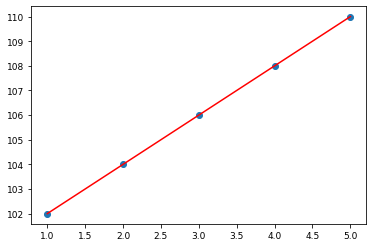

In [58]:
a = np.array([1,2,3,4,5])
b = 2 * a + 100
a = a.reshape(-1,1)
b = b.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(a,b)
b_pred = model.predict(a)

plt.scatter(a, b)
plt.plot(a, b_pred, color='red')
plt.show()